<a href="https://colab.research.google.com/github/He-Haiyang/Dataset/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2019-07-03 22:59:57--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.50
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.73.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  7.45MB/s    in 3.4s    

2019-07-03 23:00:06 (7.45 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-07-03 23:00:07--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.94
Connecting to fashion-mnist.s3-website.eu-central-1.amazona

In [0]:
!mkdir MNIST_Fashion
! cp *.gz MNIST_Fashion
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_Fashion/")

W0703 23:00:28.186037 140121853040512 deprecation.py:323] From <ipython-input-3-5764603a4c5c>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0703 23:00:28.187826 140121853040512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0703 23:00:28.191127 140121853040512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting MNIST_Fashion/train-images-idx3-ubyte.gz


W0703 23:00:28.492500 140121853040512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0703 23:00:28.556799 140121853040512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting MNIST_Fashion/train-labels-idx1-ubyte.gz
Extracting MNIST_Fashion/t10k-images-idx3-ubyte.gz
Extracting MNIST_Fashion/t10k-labels-idx1-ubyte.gz


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.42352945 0.4666667  0.40784317 0.         0.
 0.00784314 0.00392157 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01176471 0.         0.3529412  0.5254902
 0.         0.23137257 0.5647059  0.         0.00392157 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.65882355 0.         0.         0.
 0.5019608  0.1764706  0.         0.01176471 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00392157 0.02352941 0.         0.3137255
 0.36862746 0.         0.00784314 

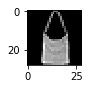

In [0]:
plt.figure(figsize=(1, 1))
sample_image = mnist.train.next_batch(1)[0]
print(sample_image[0])

sample_image = sample_image.reshape(28, 28)
plt.imshow(sample_image, cmap="gray")

## Hyperparameter settings

In [0]:
learning_rate = 0.0002
epochs = 100000
batch_size = 128

image_dim = 784
gen_hidden_dim = 256
disc_hidden_dim = 256
z_noise_dim = 100

def xavier_init(shape):
  return tf.random_normal(shape, stddev=1./tf.sqrt(shape[0]/2.0))

## Defining weights and bias dictionaries

In [0]:
weights = {
    "disc_H": tf.Variable(xavier_init([image_dim, disc_hidden_dim])),
    "disc_final": tf.Variable(xavier_init([disc_hidden_dim, 1])),
    "gen_H": tf.Variable(xavier_init([z_noise_dim, gen_hidden_dim])),
    "gen_final": tf.Variable(xavier_init([gen_hidden_dim, image_dim]))
}

bias = {
    "disc_H": tf.Variable(xavier_init([disc_hidden_dim])),
    "disc_final":tf.Variable(xavier_init([1])),
    "gen_H": tf.Variable(xavier_init([gen_hidden_dim])),
    "gen_final": tf.Variable(xavier_init([image_dim]))
}

## Creating the computational graph

In [0]:
def Discriminator(x):
  hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, weights["disc_H"]), bias["disc_H"]))
  final_layer = tf.add(tf.matmul(hidden_layer, weights["disc_final"]), bias["disc_final"])
  disc_output = tf.nn.sigmoid(final_layer)
  return final_layer, disc_output


def Generator(x):
  hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, weights["gen_H"]), bias["gen_H"]))
  final_layer = tf.add(tf.matmul(hidden_layer, weights["gen_final"]), bias["gen_final"])
  gen_output = tf.nn.sigmoid(final_layer)
  return gen_output

Z_input = tf.placeholder(tf.float32, shape = [None, z_noise_dim], name = "Input_noise")
X_input = tf.placeholder(tf.float32, shape = [None, image_dim], name = "Real_input")
  
with tf.name_scope("Generator") as scope:
  output_Gen = Generator(Z_input)
  
with tf.name_scope("Discriminator") as scope:
  real_output1_Disc, real_output_Disc = Discriminator(X_input)
  fake_output1_Disc, fake_output_Disc = Discriminator(output_Gen)

## Defining the first kind of loss function

In [0]:
with tf.name_scope("Discriminator_Loss") as scope:
  Discriminator_Loss = -tf.reduce_mean(tf.log(real_output_Disc + 0.0001) + tf.log(1.-fake_output_Disc + 0.0001))
  
with tf.name_scope("Generator_Loss") as scope:
  Generator_Loss = -tf.reduce_mean(tf.log(fake_output_Disc + 0.0001))
  
Disc_loss_total = tf.summary.scalar("Disc_total_Loss", Discriminator_Loss)
Gen_loss_total = tf.summary.scalar("Gen_total_loss", Generator_Loss)

## Defining the second kind of loss function

In [0]:
with tf.name_scope("Discriminator_Loss") as scope:
  Disc_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = real_output1_Disc, labels = tf.ones_like(real_output1_Disc)))
  Disc_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = fake_output1_Disc, labels = tf.zeros_like(fake_output1_Disc)))
  Discriminator_Loss = Disc_real_loss + Disc_fake_loss
  
with tf.name_scope("Generator_Loss") as scope:
  Generator_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = fake_output1_Disc, labels = tf.ones_like(fake_output1_Disc)))
  
  
Disc_loss_real_summary = tf.summary.scalar("Disc_real_loss", Disc_real_loss)
Disc_loss_fake_summary = tf.summary.scalar("Disc_fake_loss", Disc_fake_loss)
Disc_loss_summary = tf.summary.scalar("Disc_total_loss", Discriminator_Loss)


Disc_loss_total = tf.summary.merge([Disc_loss_real_summary, Disc_loss_fake_summary, Disc_loss_summary])
Gen_loss_total = tf.summary.scalar("Gen_Loss", Generator_loss)

W0703 22:36:06.899369 140627287127936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Define the variables to be trained during training

In [0]:
Generator_var = [weights["gen_H"], weights["gen_final"], bias["gen_H"], bias["gen_final"]]
Discriminator_var = [weights["disc_H"], weights["disc_final"], bias["disc_H"], bias["disc_final"]]

with tf.name_scope("Optimizer_discriminator") as scope:
  Discriminator_optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(Discriminator_Loss, var_list = Discriminator_var)

with tf.name_scope("Optimizer_generator") as scope:
  Generator_optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(Generator_Loss, var_list = Generator_var)

## Run the compuational graph

In [0]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter("./log", sess.graph)

for epoch in range(epochs):
  x_batch, _ = mnist.train.next_batch(batch_size)
  z_noise = np.random.uniform(-1., 1., size = [batch_size, z_noise_dim])
  _, Disc_loss_epoch = sess.run([Discriminator_optimizer, Discriminator_Loss], feed_dict = {X_input: x_batch, Z_input: z_noise})
  _, Gen_loss_epoch = sess.run([Generator_optimizer, Generator_Loss], feed_dict = {Z_input:z_noise})
  
  summary_Disc_loss = sess.run(Disc_loss_total, feed_dict = {X_input: x_batch, Z_input:z_noise})
  writer.add_summary(summary_Disc_loss, epoch)
  
  summary_Gen_loss = sess.run(Gen_loss_total, feed_dict = {Z_input:z_noise})
  writer.add_summary(summary_Gen_loss, epoch)
  
  if not epoch%2000:
    print("Epoch :{0} :Geneartor Loss: {1}, Discriminator Loss: {2}".format(epoch, Gen_loss_epoch, Disc_loss_epoch))

Epoch :0 :Geneartor Loss: 2.171452045440674, Discriminator Loss: 2.783787250518799
Epoch :2000 :Geneartor Loss: 5.269892692565918, Discriminator Loss: 0.037253715097904205
Epoch :4000 :Geneartor Loss: 3.762362003326416, Discriminator Loss: 0.08669276535511017
Epoch :6000 :Geneartor Loss: 3.9069294929504395, Discriminator Loss: 0.13462771475315094
Epoch :8000 :Geneartor Loss: 2.9310550689697266, Discriminator Loss: 0.2450733333826065
Epoch :10000 :Geneartor Loss: 2.685447931289673, Discriminator Loss: 0.31128281354904175
Epoch :12000 :Geneartor Loss: 2.7808914184570312, Discriminator Loss: 0.41135913133621216
Epoch :14000 :Geneartor Loss: 2.6679799556732178, Discriminator Loss: 0.5368112325668335
Epoch :16000 :Geneartor Loss: 2.364048480987549, Discriminator Loss: 0.6262546181678772
Epoch :18000 :Geneartor Loss: 2.2895123958587646, Discriminator Loss: 0.4936774671077728
Epoch :20000 :Geneartor Loss: 2.277991771697998, Discriminator Loss: 0.561287522315979
Epoch :22000 :Geneartor Loss: 2

## Creating testing cases

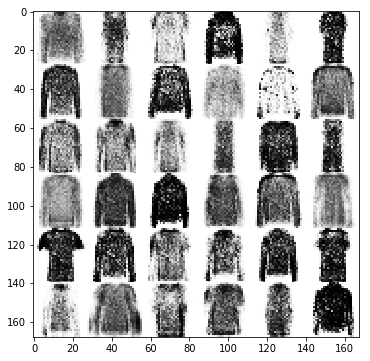

In [0]:
n = 6
canvas = np.empty((28 * n, 28 * n))
for i in range(n):
  Z_noise = np.random.uniform(-1., 1., size = [batch_size, z_noise_dim])
  g = sess.run(output_Gen, feed_dict = {Z_input: Z_noise})
  g = -1 * (g - 1)
  for j in range(n):
    canvas[i * 28:(i+1)*28, j*28:(j+1)*28] = g[j].reshape([28, 28])
plt.figure(figsize = (n, n))
plt.imshow(canvas, origin="upper", cmap="gray")
plt.show()

In [0]:
rm -rf log